In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

c:\users\skennedy\.virtualenvs\lab1-chmlaxk4\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\skennedy\.virtualenvs\lab1-chmlaxk4\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\skennedy\.virtualenvs\lab1-chmlaxk4\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\skennedy\.virtualenvs\lab1-chmlaxk4\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\skennedy\.virtualenvs\lab1-chmlaxk4\lib\importlib\_bootstra

In [186]:
def show_correlation_matrix(data):
    # Compute the correlation matrix
    corr = data[continuous].corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [146]:
air_bnb = pd.read_csv('airbnb_clean.csv')
categorical_columns = air_bnb.dtypes[(air_bnb.dtypes != np.float64)]
numeric_columns = air_bnb.dtypes[(air_bnb.dtypes == np.float64)]

for x in categorical_columns.index:
    air_bnb[x] =  air_bnb[x].astype('category')

air_bnb['ZIP'] = air_bnb['ZIP'].astype('category')
target = 'room_type'
air_bnb.describe()
print(air_bnb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40180 entries, 0 to 40179
Data columns (total 23 columns):
neighbourhood_group               40180 non-null category
neighbourhood                     40180 non-null category
latitude                          40180 non-null float64
longitude                         40180 non-null float64
room_type                         40180 non-null category
price                             40180 non-null float64
minimum_nights                    40180 non-null float64
number_of_reviews                 40180 non-null float64
reviews_per_month                 40180 non-null float64
calculated_host_listings_count    40180 non-null float64
availability_365                  40180 non-null float64
ZIP                               40157 non-null category
dist_subway                       40180 non-null float64
cnt_all                           40180 non-null float64
cnt_entire_home                   40180 non-null float64
cnt_private_room                

### Objective

- Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

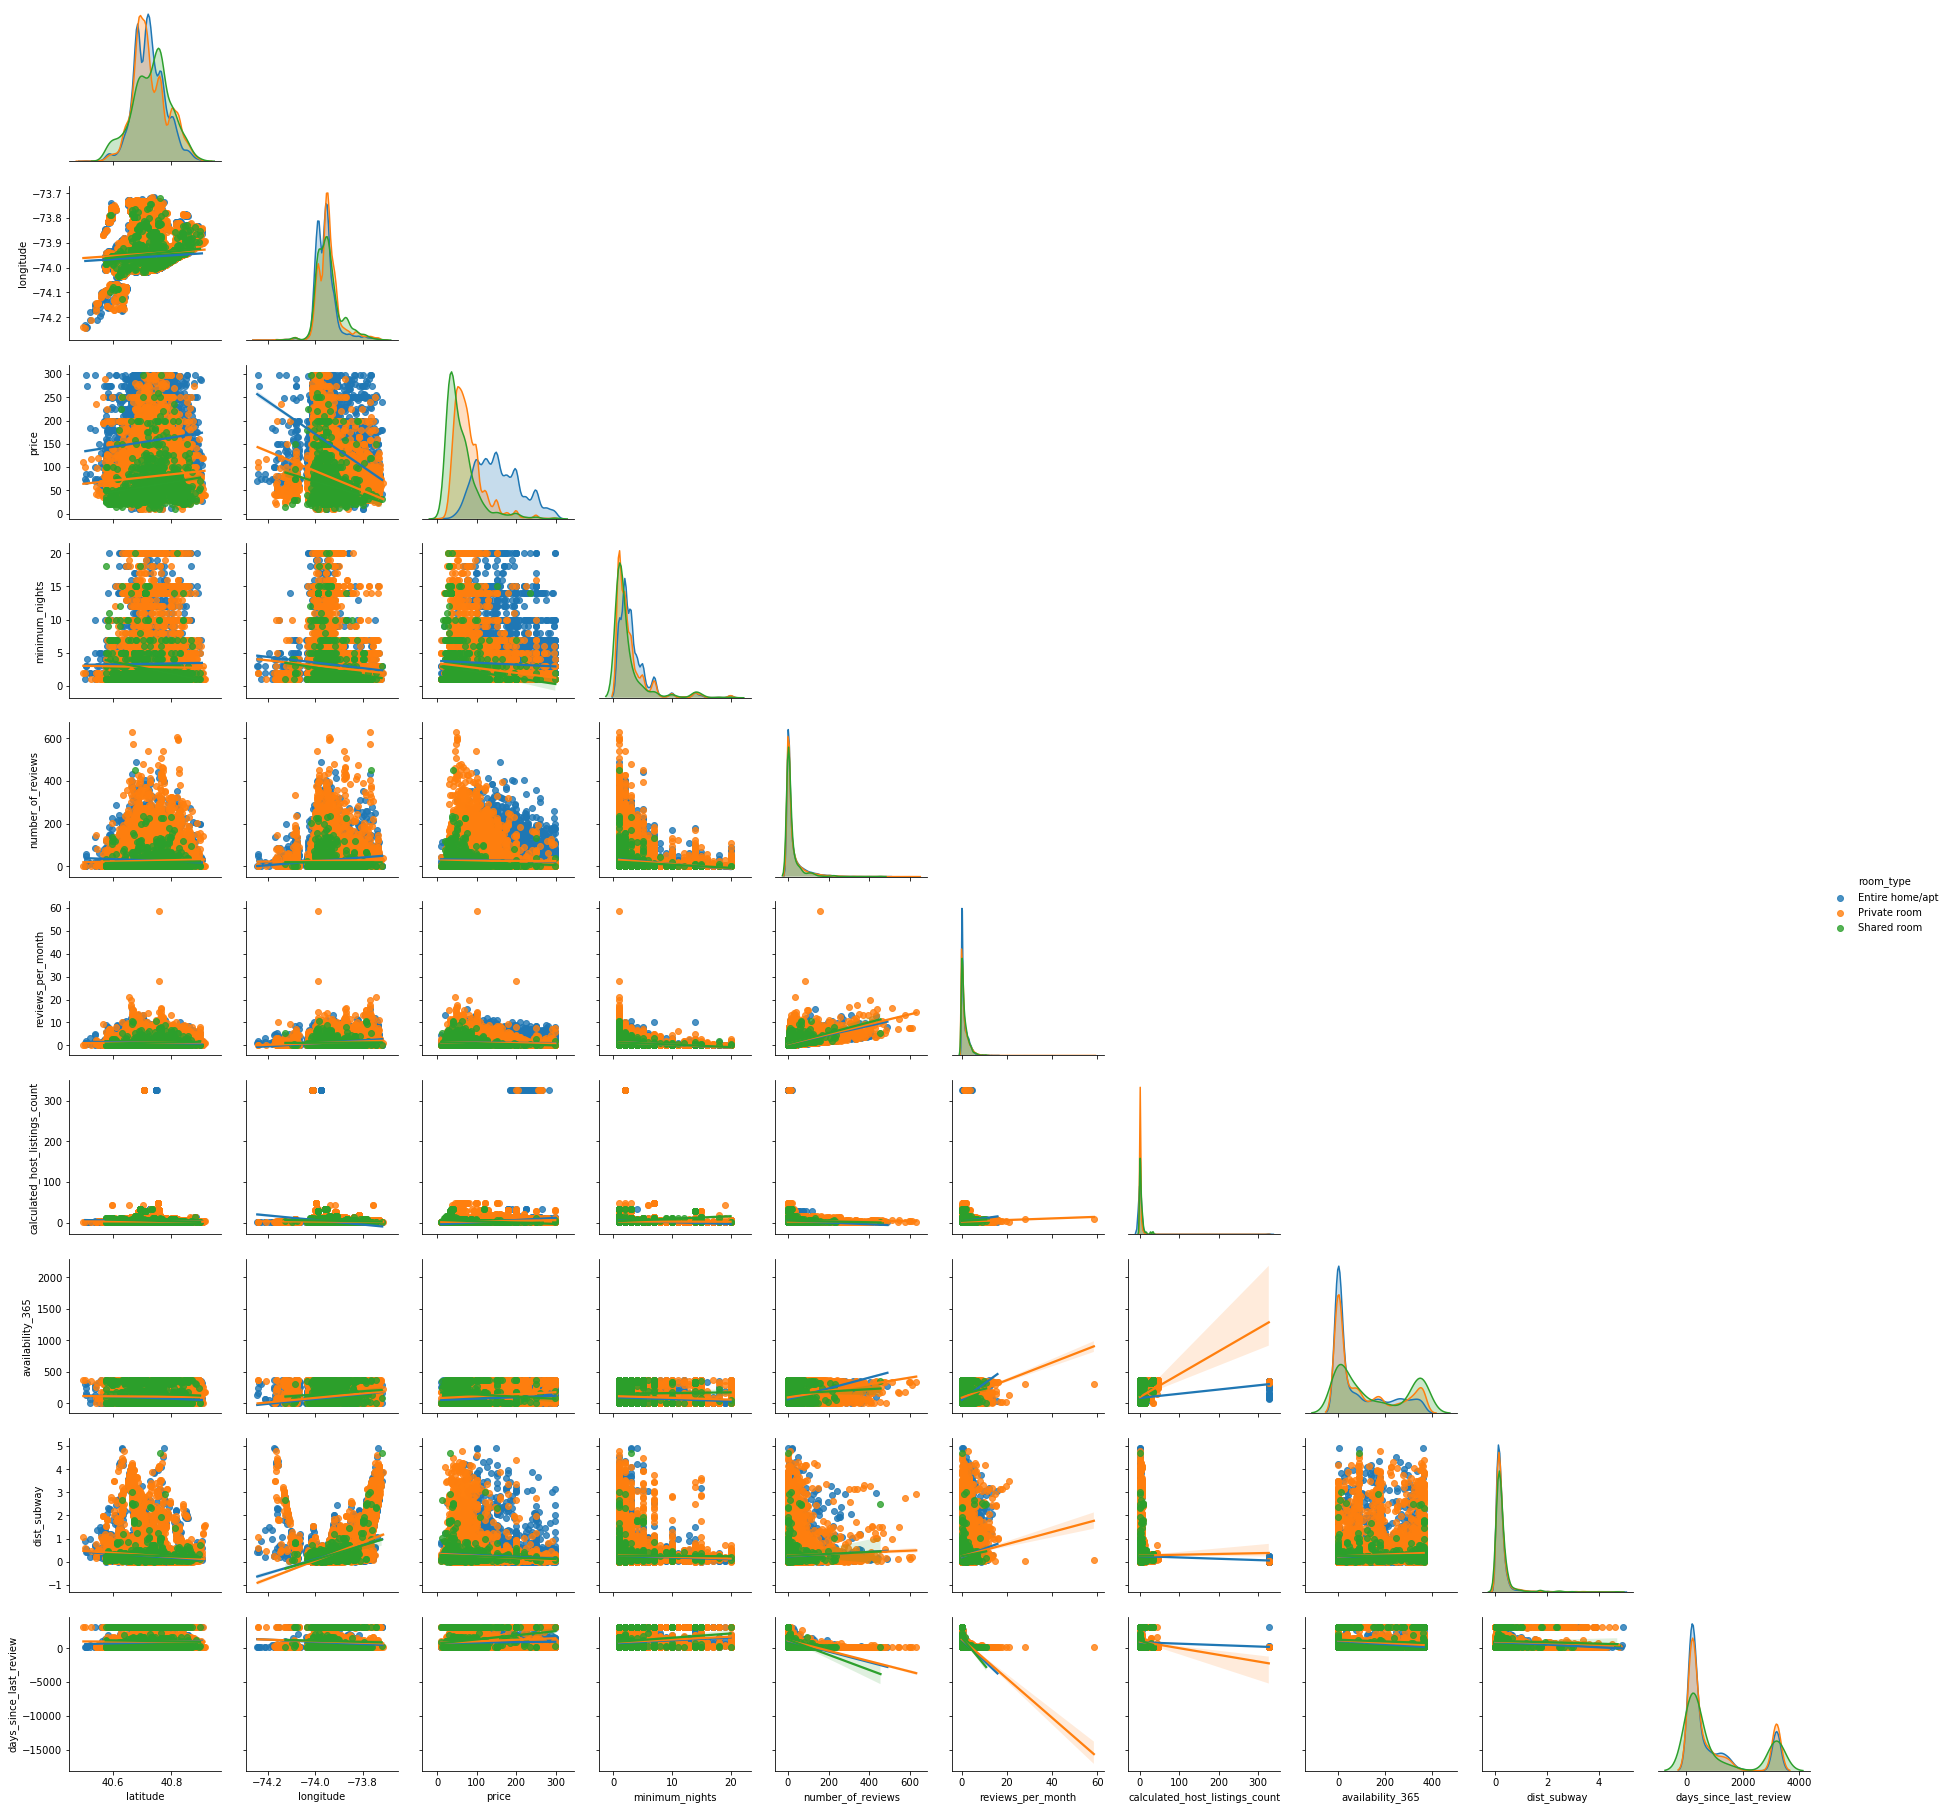

In [183]:
continuous = ['latitude', 'room_type', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month'
              , 'calculated_host_listings_count', 'availability_365', 'dist_subway', 'days_since_last_review']
sns.pairplot(air_bnb[continuous], hue=target, kind='reg', corner=True)

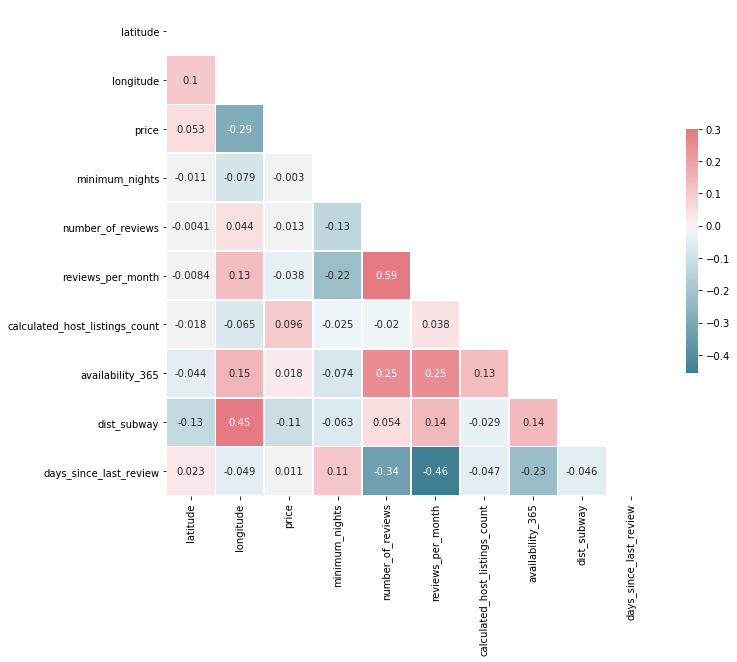

In [187]:
show_correlation_matrix(air_bnb[continuous])

### General takeaways from Scatter/Correlation analysis:

- number_of_reviews and reviews_per_month are highly correlated, as expected. Only one should make it into the final model.

- Most other correlations are not significant or are expected

### Relationships between price and room_type

- Generally speaking, **Entire home/apt** listings are more expensive than other types. This is not altogether unexpected.

In [188]:
air_bnb.groupby(['room_type']).agg(['mean','median', 'min', 'max','count'])[['price']]

price                           
                       mean median   min    max  count
room_type                                             
Entire home/apt  155.974602  150.0  10.0  299.0  18742
Private room      79.464975   70.0  10.0  299.0  20414
Shared room       60.152344   49.0  10.0  299.0   1024

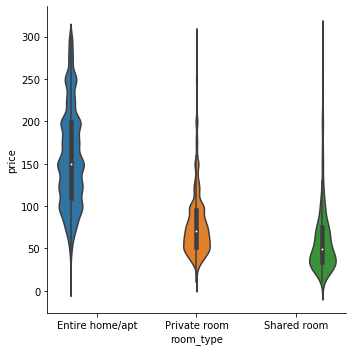

In [189]:
sns.catplot(x='room_type', y='price', data=air_bnb, hue='room_type', kind='violin')

### Relationships between price, neighbourhood_group and room_type

- On average, entire homes are more expensive to rent in each of the boroughs with Manhattan being the most expensive for each room type.

In [190]:
air_bnb.groupby(['neighbourhood_group', 'room_type']).agg(['mean','median', 'min', 'max','count'])[['price']]

price                          
                                           mean median   min    max count
neighbourhood_group room_type                                            
Bronx               Entire home/apt  111.213650  100.0  28.0  299.0   337
                    Private room      60.256039   55.0  10.0  240.0   621
                    Shared room       47.637931   40.0  20.0  165.0    58
Brooklyn            Entire home/apt  145.022469  139.0  10.0  299.0  8011
                    Private room      70.956345   65.0  10.0  299.0  9369
                    Shared room       50.352071   38.0  15.0  250.0   338
Manhattan           Entire home/apt  174.806363  175.0  10.0  299.0  8361
                    Private room      97.876583   90.0  10.0  299.0  7187
                    Shared room       74.904545   68.0  10.0  299.0   440
Queens              Entire home/apt  129.953649  120.0  10.0  299.0  1877
                    Private room      67.206863   60.0  10.0  289.0  3060
                    Shared room       46.586592   37.0  11.0  200.0   179
Staten Island       Entire home/apt  118.865385  100.0  48.0  299.0   156
                    Private room      61.564972   52.0  20.0  235.0   177
                    Shared room       57.444444   30.0  13.0  150.0     9

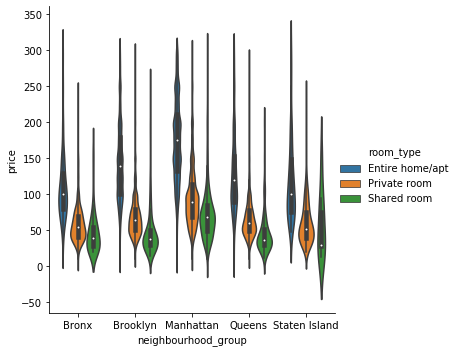

In [191]:
sns.catplot(x='neighbourhood_group', y='price', data=air_bnb, hue='room_type', kind='violin')

### Relationships between room_type and number_of_reviews and room_type

- The average number of reviews doesn't seem to be a great differentiator for the first two levels of our class, but should provide good separation between class 1+2 and 3 (Shared room)

In [192]:
air_bnb.groupby(['room_type']).agg(['mean','median', 'min', 'max','count'])[['number_of_reviews']]

number_of_reviews                          
                             mean median  min    max  count
room_type                                                  
Entire home/apt         26.677729    7.0  0.0  488.0  18742
Private room            25.636426    6.0  0.0  629.0  20414
Shared room             18.371094    5.0  0.0  454.0   1024

### Most meanigful relationships

- From the scattergram above, it appears that there are four continuous predictors that provide good separataion on our target variable, room_type

    * price
    * dist_subway
    * number_of_reviews
    * minimum_nights
    

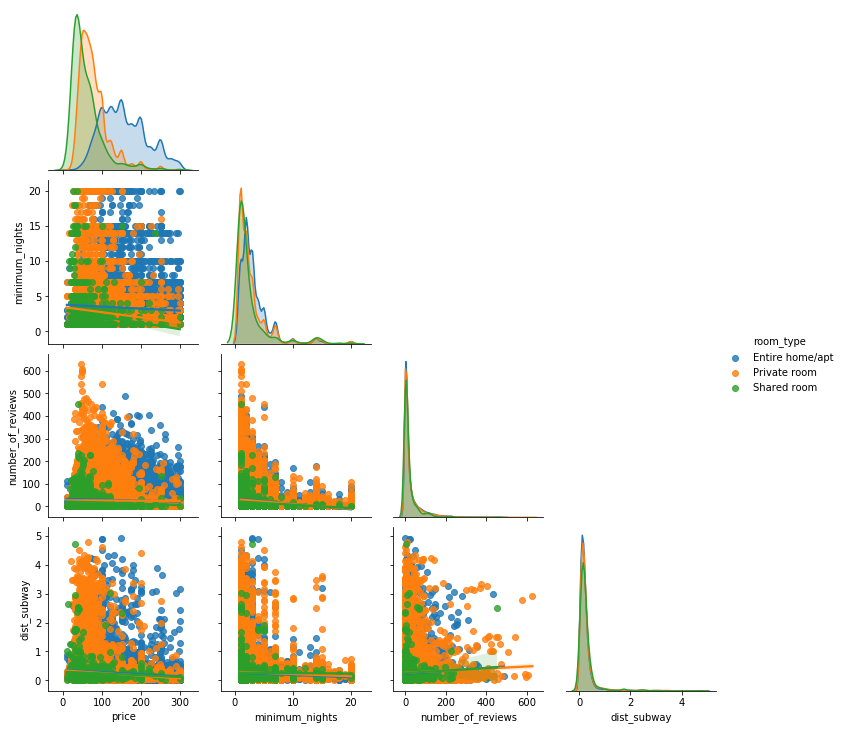

In [193]:
continuous = ['room_type', 'price', 'minimum_nights', 'number_of_reviews', 'dist_subway']
sns.pairplot(air_bnb[continuous], hue=target, kind='reg', corner=True)

### Correlation of Continuous Predictors

- The correlation of our continuous predictors to each other is very low. This indicates that the simpler model is not suffering from multicollinearity.

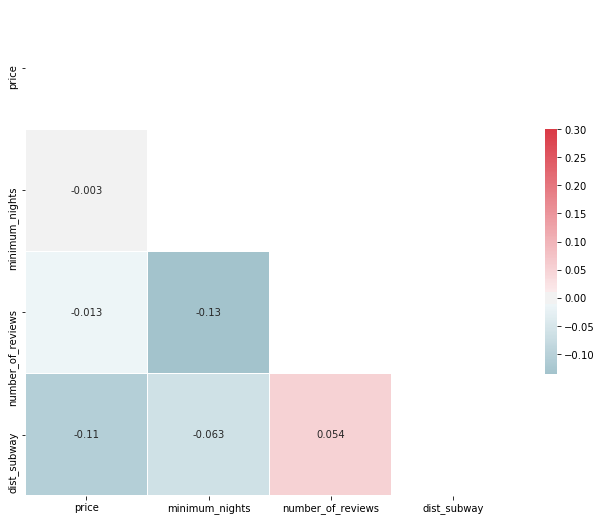

In [194]:
show_correlation_matrix(air_bnb[continuous])

### Objective

- Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).



The classes we are predicting in this analysis is the room_type variable - which can take 1 of 3 possible values:

    - Entire home/apt
    - Private room
    - Shared room
    
### Searching for relationships between our categorical predictors and the classes:

### Room Type By Neighborhood Group

Text(0, 0.5, 'Freq')

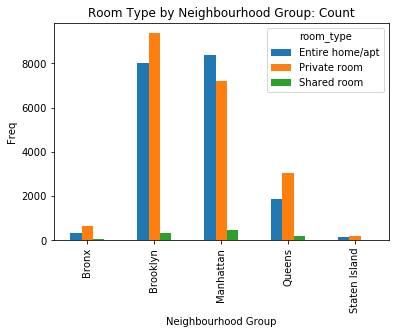

In [198]:
pd.crosstab(air_bnb['neighbourhood_group'], air_bnb.room_type).plot(kind='bar')
plt.title(f'Room Type by Neighbourhood Group: Count')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Freq')

Text(0, 0.5, 'Prob')

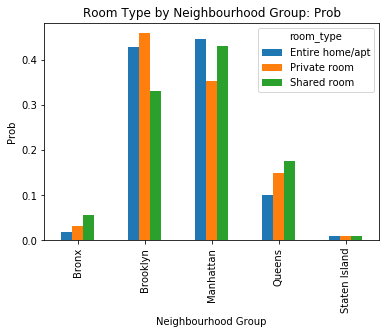

In [200]:
(pd.crosstab(air_bnb['neighbourhood_group'], air_bnb.room_type)/ pd.crosstab(air_bnb['neighbourhood_group'], air_bnb.room_type).sum()).plot(kind='bar')
plt.title(f'Room Type by Neighbourhood Group: Prob')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Prob')

- From the barplot above - **Manhattan and Brooklyn** overall have the most istings available across all room types with Manhattan being slightly tilted towards **Entire home/apt** listings and Brooklyn having a slight skew towards **Private rooms**

- Of the inventory available in each category **Brooklyn and Manhattan** account for:
    - 88% of Entire home/apt listings
    - 81% of Private room listings
    - 77% of Shared room listings
    
- According to the probabilities above, the most likely borough to find an entire apartment for rent is **Manhattan** whereas the most likely borough to find a private roomn is in **Brooklyn**
    
- **Queens** is a distant third when it comes to overall listings, whereas the **Bronx and Staten Island** have marginal contributions to the overall totals.

In [149]:
(pd.crosstab(air_bnb['neighbourhood_group'], air_bnb.room_type)/ pd.crosstab(air_bnb['neighbourhood_group'], air_bnb.room_type).sum())

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,0.017981,0.030420,0.056641
Brooklyn,0.427436,0.458950,0.330078
Manhattan,0.446110,0.352062,0.429688
Queens,0.100149,0.149897,0.174805
Staten Island,0.008324,0.008671,0.008789


### Room Type By Neighborhood

In [150]:
pd.crosstab(air_bnb['neighbourhood'], air_bnb.room_type).sort_values(['Entire home/apt'], ascending=False).head(5)

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Williamsburg,1502,1868,29
Bedford-Stuyvesant,1403,1844,75
East Village,894,607,21
Upper East Side,856,398,38
Harlem,846,1449,48


In [151]:
pd.crosstab(air_bnb['neighbourhood'], air_bnb.room_type).sort_values(['Entire home/apt'], ascending=False).head(5)/pd.crosstab(air_bnb['neighbourhood'], air_bnb.room_type).sum()

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Williamsburg,0.080141,0.091506,0.028320
Bedford-Stuyvesant,0.074859,0.090330,0.073242
East Village,0.047700,0.029734,0.020508
Upper East Side,0.045673,0.019496,0.037109
Harlem,0.045139,0.070981,0.046875


From the data tables above - we can see that the top  to find listings for **Entire home/apt** are:
    - Williamsburg
    - Bedford-Styvesant
    - Upper East Side
    - Upper West Side
    - East Village
    

In [152]:
pd.crosstab(air_bnb['neighbourhood'], air_bnb.room_type).sort_values(['Private room'], ascending=False).head(5)

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Williamsburg,1502,1868,29
Bedford-Stuyvesant,1403,1844,75
Bushwick,598,1592,34
Harlem,846,1449,48
Crown Heights,652,730,25


In [153]:
pd.crosstab(air_bnb['neighbourhood'], air_bnb.room_type).sort_values(['Private room'], ascending=False).head(5)/pd.crosstab(air_bnb['neighbourhood'], air_bnb.room_type).sum()

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Williamsburg,0.080141,0.091506,0.028320
Bedford-Stuyvesant,0.074859,0.090330,0.073242
Bushwick,0.031907,0.077986,0.033203
Harlem,0.045139,0.070981,0.046875
Crown Heights,0.034788,0.035760,0.024414


From the data tables above - we can see that the top neighborhoods to find listings for **Private room** are:
    - Bedford-Styvesant
    - Williamsburg
    - Bushwick
    - Harlem
    - Crown Heights

Of note - **4 of these 5 neighbourhoods are in Brooklyn**

In [154]:
pd.crosstab(air_bnb['neighbourhood'], air_bnb.room_type).sort_values(['Shared room'], ascending=False).head(5)

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Hell's Kitchen,665,628,95
Bedford-Stuyvesant,1403,1844,75
Harlem,846,1449,48
East Harlem,409,536,42
Upper East Side,856,398,38


In [155]:
pd.crosstab(air_bnb['neighbourhood'], air_bnb.room_type).sort_values(['Shared room'], ascending=False).head(5)/pd.crosstab(air_bnb['neighbourhood'], air_bnb.room_type).sum()

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Hell's Kitchen,0.035482,0.030763,0.092773
Bedford-Stuyvesant,0.074859,0.090330,0.073242
Harlem,0.045139,0.070981,0.046875
East Harlem,0.021823,0.026256,0.041016
Upper East Side,0.045673,0.019496,0.037109


From the data tables above - we can see that the top neighborhoods to find listings for **Shared room** are:
    - Hell's Kitchen
    - Bedford-Styvesant
    - Bushwick
    - Harlem
    - Upper East Side


### Room Type By ZIP Code

In [156]:
top_zip_codes = air_bnb.groupby('ZIP').agg(['count']).sort_values([('neighbourhood_group', 'count')], ascending=False).head(10)
top_zip_codes = list(top_zip_codes[('neighbourhood_group', 'count')].index)

Text(0, 0.5, 'Freq')

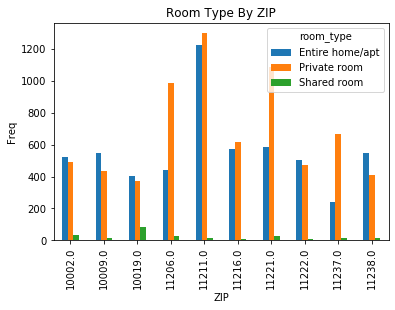

In [157]:
top_zip_data = air_bnb[air_bnb.ZIP.isin(top_zip_codes)]
pd.crosstab(top_zip_data['ZIP'], top_zip_data.room_type).plot(kind='bar')
plt.title('Room Type By ZIP')
plt.xlabel('ZIP')
plt.ylabel('Freq')

### Relationships between continuous predictors and Room Type

- Considering the most relevant continuous predictors to our classification algorithm, we can observe the following:
    
    - Properties that have high values for minimum_nights, price and number_of_reviews are generally more likely to be **Entire home/apt** listings
    
    - Properties that have high prices are generally associated with **Entire home/apt** listings (independent of other factors)
    
    - Properties with high number_of_reviews are more likely to be **Entire home/apt** listings

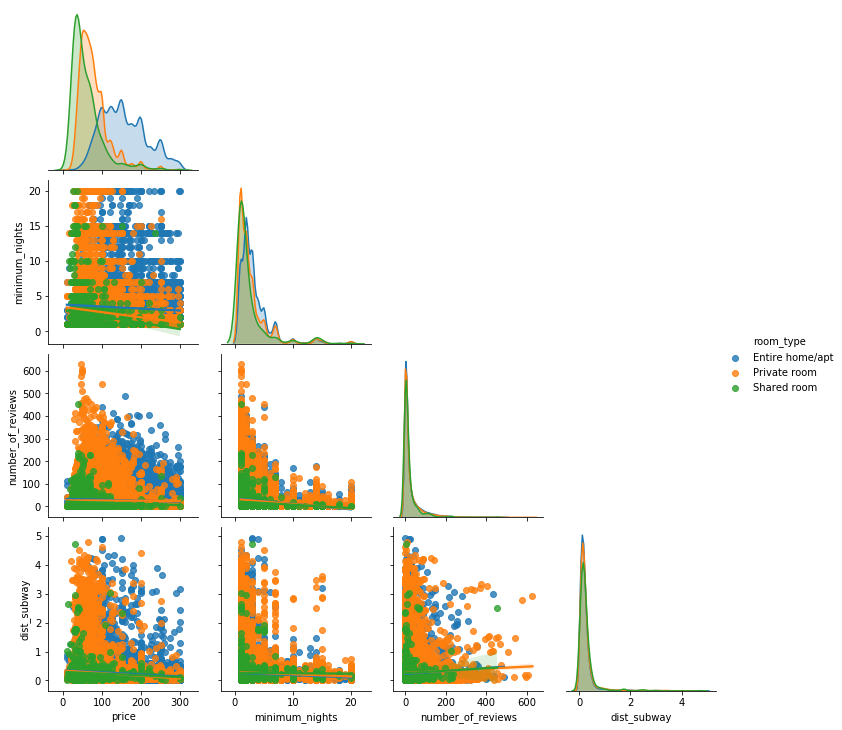

In [202]:
continuous = ['room_type', 'price', 'minimum_nights', 'number_of_reviews', 'dist_subway']
sns.pairplot(air_bnb[continuous], hue=target, kind='reg', corner=True)